### 이미지 필터링

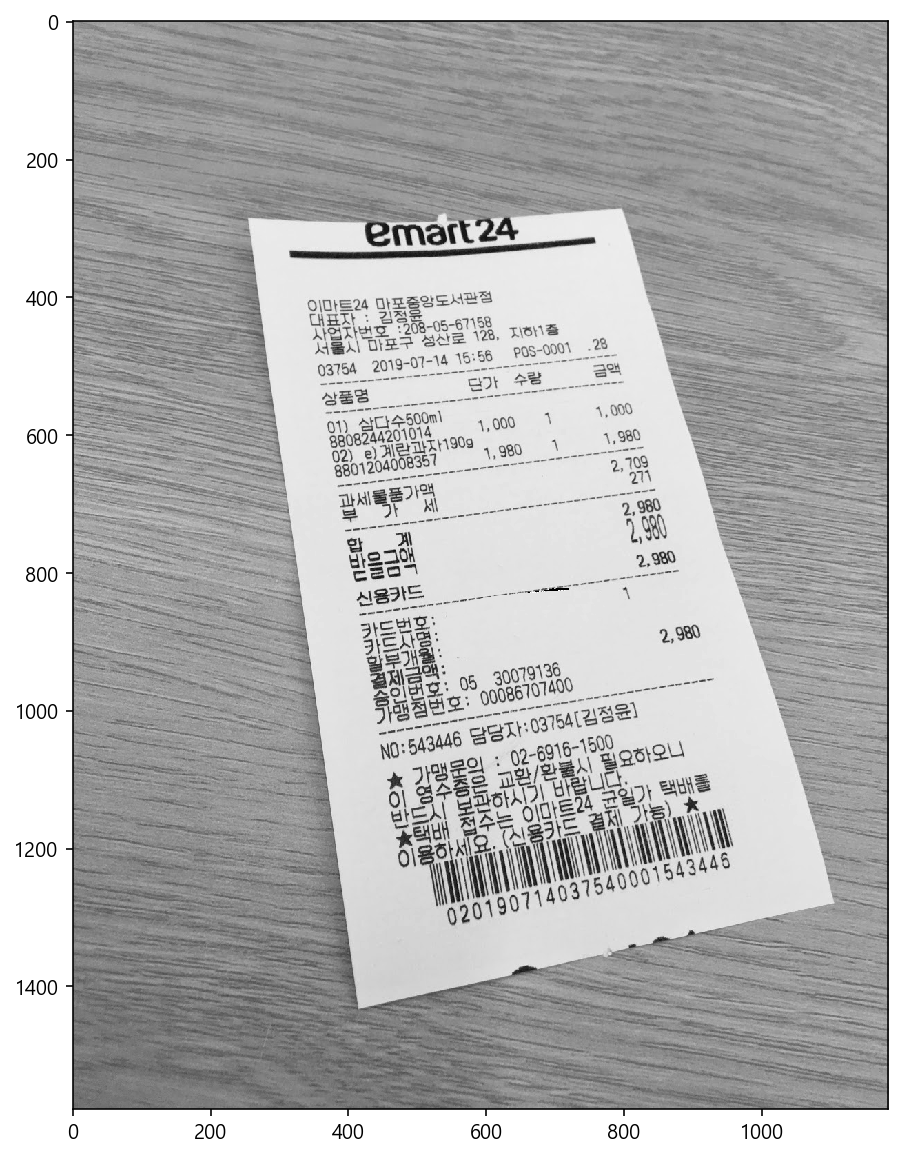

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)


img = cv2.imread("./receipt.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10, 10))
plt.imshow(img, cmap = plt.cm.gray)
plt.grid(False)
plt.show()

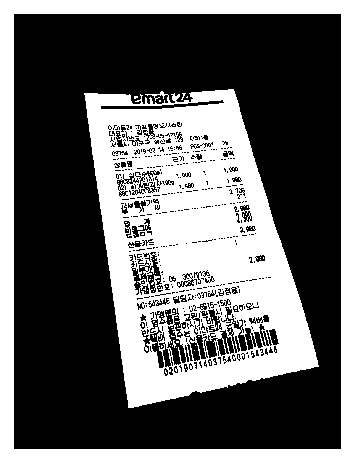

In [2]:
from skimage.data import page

img = cv2.imread("./receipt.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

maxval = 10
thresh = 200
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)


# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(th1, 3)

plt.imshow(img_denoise, 'gray')
plt.axis('off')
plt.show()

(-0.5, 1183.5, 1577.5, -0.5)

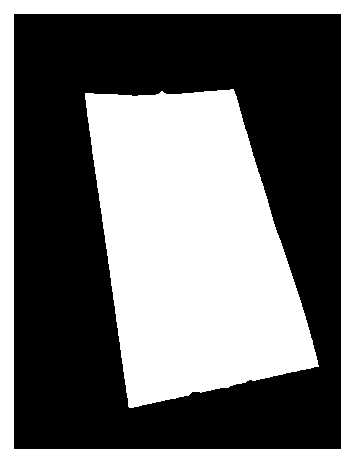

In [28]:
from skimage.data import page

img = cv2.imread("./receipt.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

maxval = 10
thresh = 200
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)


# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(th1, 3)

closing = cv2.morphologyEx(img_denoise, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 40))
)

plt.imshow(closing, cmap='gray')
plt.axis('off')

In [31]:
import cv2
from skimage.data import horse

img_raw = horse().astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw

img = img_raw.copy().astype('uint8')

contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

(-0.5, 399.5, 327.5, -0.5)

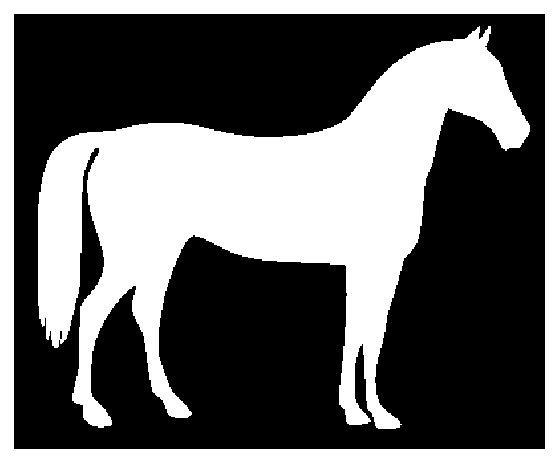

In [33]:
plt.imshow(img, cmap='gray')
plt.axis('off')

In [34]:
len(contours) #2개의 컨투어라인이 잡힘

2

In [35]:
contours[0].shape

(312, 1, 2)

In [36]:
np.squeeze(contours[0])[:5]
# 아래의 점들이 쭉 이어진게 컨투어라인이다

array([[350,   9],
       [346,  13],
       [345,  13],
       [339,  19],
       [330,  20]], dtype=int32)

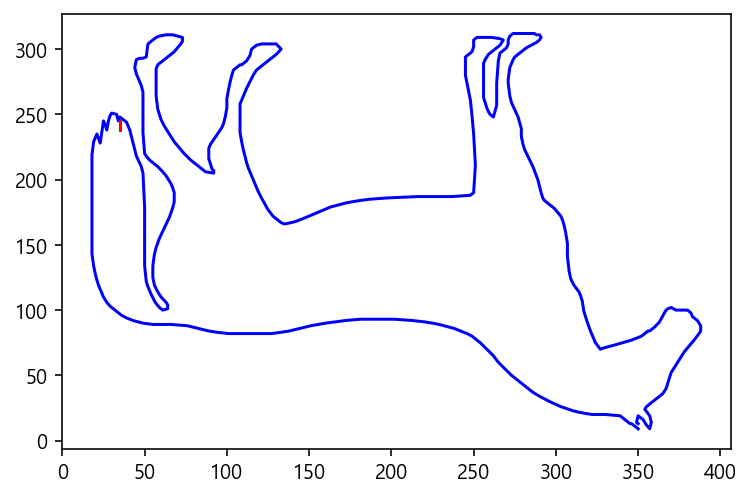

In [54]:
x0, y0 = zip(*np.squeeze(contours[0]))  #가로로 페어가 되어있는걸 세로로 변경 : *
x1, y1 = zip(*np.squeeze(contours[1]))
plt.plot(x0, y0, c="b")
plt.plot(x1, y1, c="r")
plt.show()

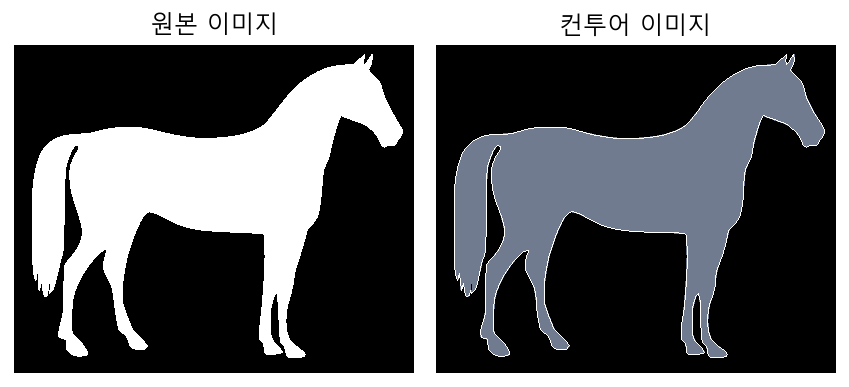

In [50]:
image = cv2.drawContours(img, contours, 0, 2)

plt.subplot(1, 2, 1)
plt.imshow(img_raw, cmap='bone')
plt.title("원본 이미지")
plt.axis('off')

#컨투어 정보에서 비ㅡ맵 이미지를 만들 수 있따
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='bone')
plt.title("컨투어 이미지")
plt.axis('off')
plt.tight_layout()
plt.show()

In [52]:
c0 = contours[0]
M = cv2.moments(c0)
M #M0는 컨투어 면적

{'m00': 42355.0,
 'm10': 7943000.166666666,
 'm01': 6115675.833333333,
 'm20': 1914995009.1666665,
 'm11': 1043128904.8333333,
 'm02': 1041817606.0,
 'm30': 517465951777.85004,
 'm21': 233874687443.69998,
 'm12': 169430720481.3,
 'm03': 200904428563.85,
 'mu20': 425412866.6175771,
 'mu11': -103767899.87557864,
 'mu02': 158769774.61250484,
 'mu30': -1219318387.8395386,
 'mu21': -3713125246.697487,
 'mu12': 4020833974.2852783,
 'mu03': 4625649126.278534,
 'nu20': 0.2371380524771235,
 'nu11': -0.0578433790256196,
 'nu02': 0.08850309451896964,
 'nu30': -0.003302595676372647,
 'nu21': -0.010057218449154588,
 'nu12': 0.010890665663146169,
 'nu03': 0.012528843128440374}

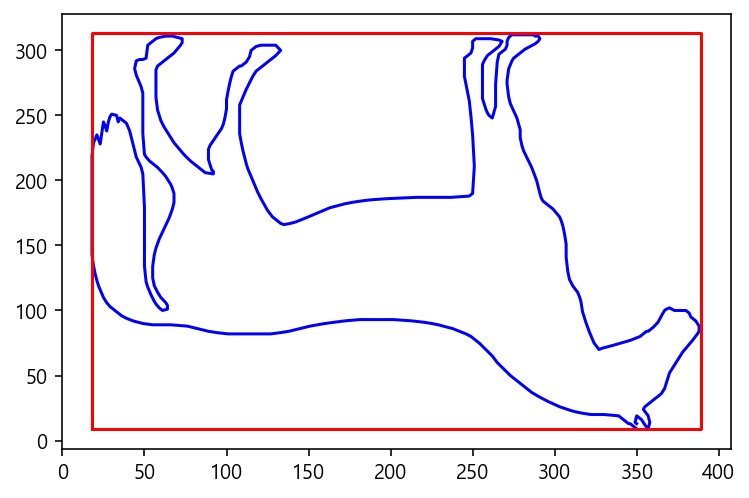

In [56]:
# 컨투어박스
x, y, w, h = cv2.boundingRect(c0)
x, y, w, h

plt.plot(x0, y0, c="b")
plt.plot(
    [x, x + w, x + w, x, x], 
    [y, y, y + h, y + h, y],
    c="r"
)
plt.show()

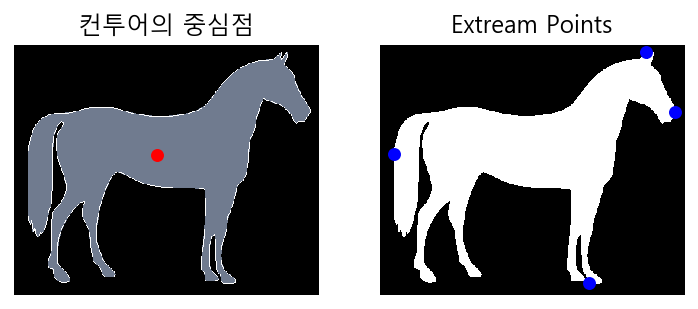

In [57]:
# 컨투어 라인의 중심점과 좌우상하 끝점
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])

plt.subplot(1,2,1)
plt.imshow(image, cmap='bone')
plt.title("컨투어의 중심점")
plt.axis('off')
plt.scatter([cx], [cy], c="r", s=30)

plt.subplot(1,2,2)
plt.imshow(img_raw, cmap='bone')
plt.axis("off")
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="b", s=30)
plt.title("Extream Points")

plt.show()

(-0.5, 1183.5, 1577.5, -0.5)

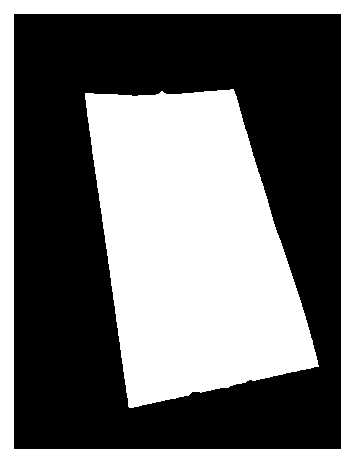

In [72]:
from skimage.data import page

img = cv2.imread("./receipt.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

maxval = 10
thresh = 200
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)


# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(th1, 3)

closing = cv2.morphologyEx(img_denoise, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 40))
)

plt.imshow(closing, cmap='gray')
plt.axis('off')

In [76]:
import cv2

# img_raw = closing.astype('uint8')
# img_raw = np.ones(img_raw.shape) - img_raw

# img = img_raw.copy().astype('uint8')

contours, hierachy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

In [77]:
x0, y0 = zip(*np.squeeze(contours[0]))  #가로로 페어가 되어있는걸 세로로 변경 : *
c0 = contours[0]
M = cv2.moments(c0)

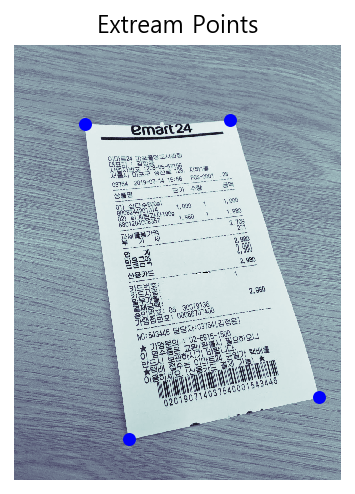

In [82]:
# 컨투어 라인의좌우상하 끝점
img = cv2.imread("./receipt.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])


plt.imshow(img, cmap='bone')
plt.axis("off")
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="b", s=30)
plt.title("Extream Points")

plt.show()

In [120]:
leftmost, rightmost, topmost, bottommost

((256, 287), (1103, 1278), (782, 273), (415, 1431))

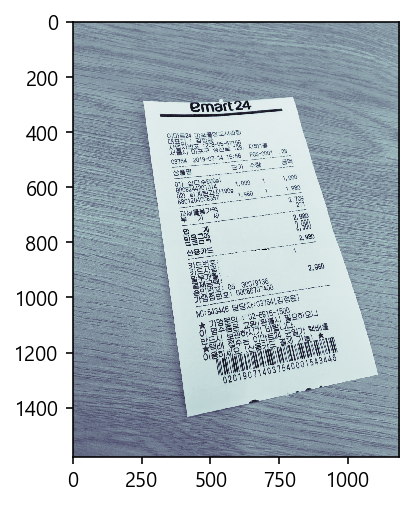

In [132]:
img = cv2.imread("./receipt.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rows, cols = img.shape
rows,cols
plt.imshow(img, cmap='bone')
plt.show()

In [130]:
img

array([[149, 127, 125, ..., 140, 150, 150],
       [152, 137, 135, ..., 143, 138, 141],
       [155, 150, 148, ..., 136, 152, 156],
       ...,
       [116, 114, 111, ..., 153, 147, 147],
       [109, 113, 110, ..., 166, 163, 166],
       [109, 113, 110, ..., 166, 163, 166]], dtype=uint8)

In [140]:
img = cv2.imread("./receipt.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rows, cols = img.shape

pts1 = np.float32([leftmost,rightmost,topmost,bottommost])
pts2 = np.float32([[0, 0], [cols,rows], [cols,0],[0,rows]])


H_affine = cv2.getPerspectiveTransform(pts1, pts2)
H_affine

array([[ 2.18637179e+00, -3.03875101e-01, -4.72499025e+02],
       [ 5.42734661e-02,  2.03913165e+00, -5.99124792e+02],
       [-1.67023548e-04,  3.86505402e-04,  1.00000000e+00]])

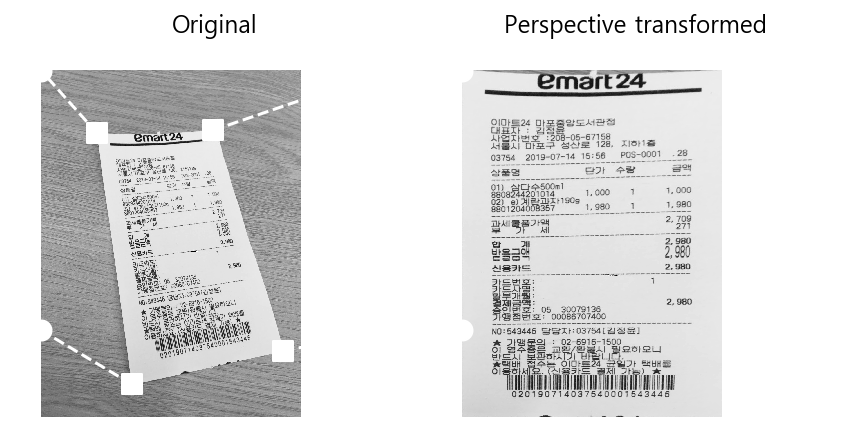

In [146]:
img2 = cv2.warpPerspective(img, H_affine, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2)

ax1.set_title("Original")
ax1.imshow(img,'gray')
ax1.scatter(pts_x1, pts_y1, c='w', s=100, marker="s")
ax1.scatter(pts_x2, pts_y2, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x1, pts_x2), axis=-1))),
         list(zip(*np.stack((pts_y1, pts_y2), axis=-1))), "--", c="w")
ax1.axis("off")

ax2.set_title("Perspective transformed")
ax2.imshow(img2, 'gray')
ax2.scatter(pts_x2, pts_y2, c='w', s=100)
ax2.axis("off")

plt.tight_layout()
plt.show()

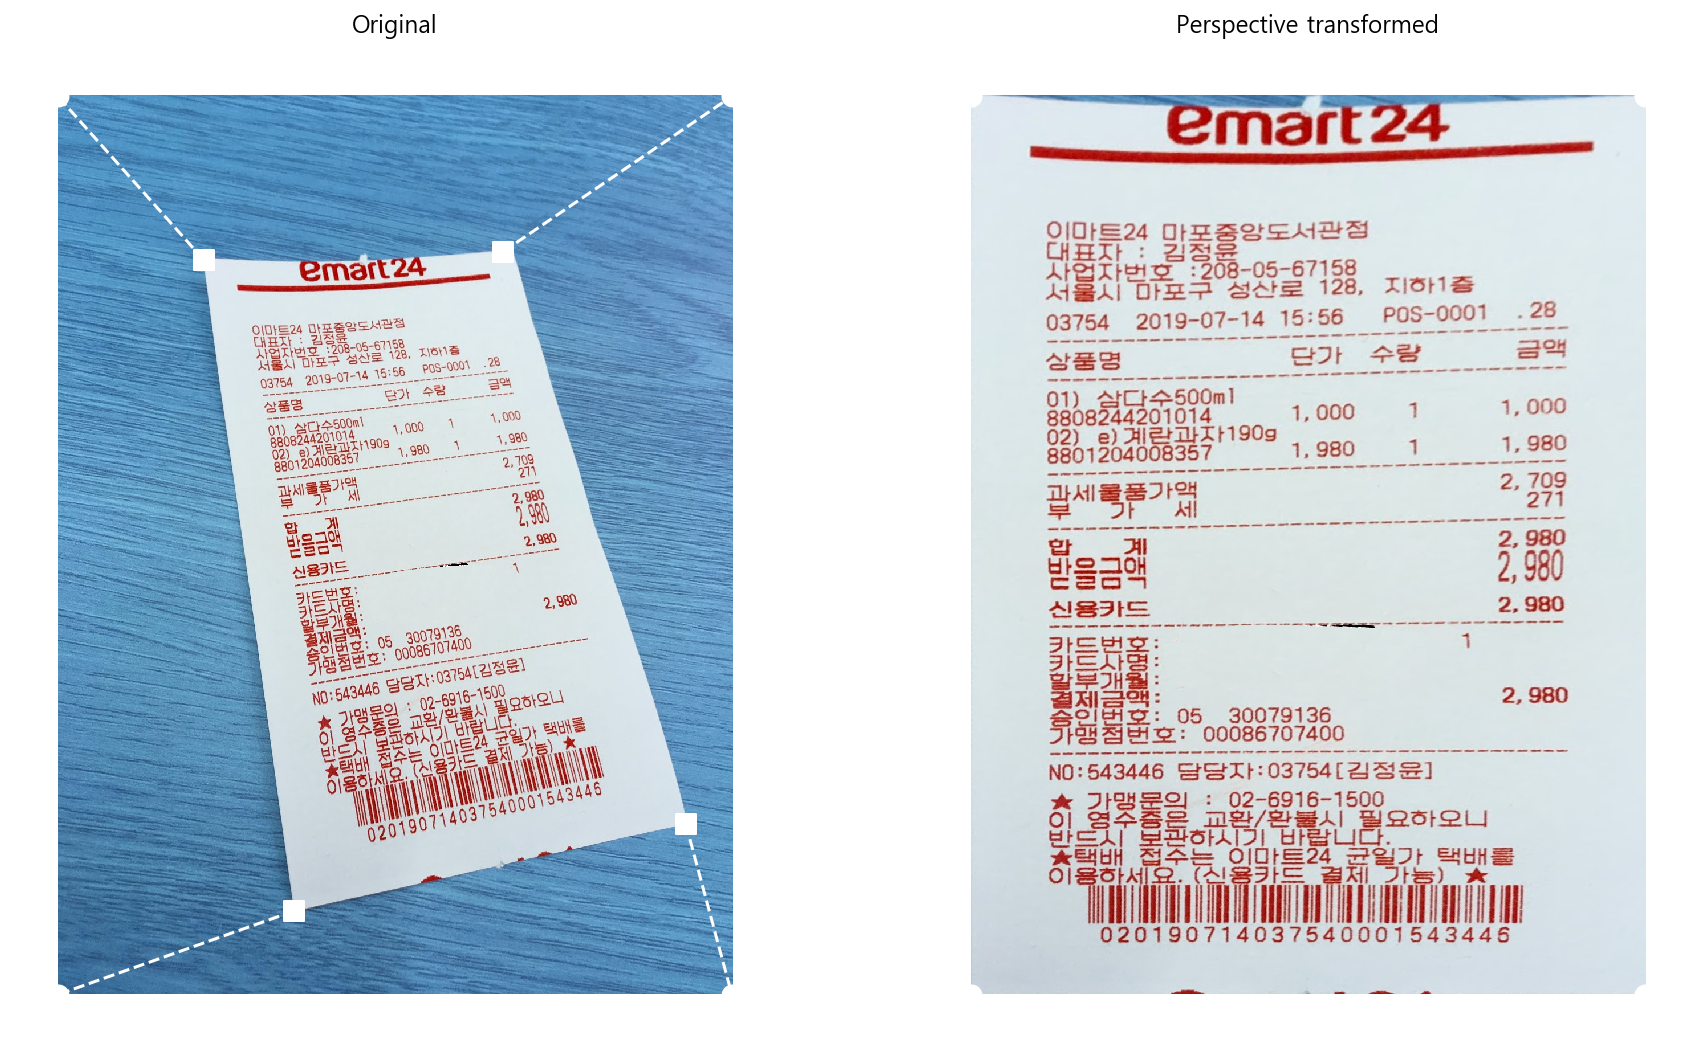

In [139]:

# 원근변환
pts1 = np.float32([leftmost,rightmost,topmost,bottommost])
pts2 = np.float32([[0, 0], [1184, 1578], [1184, 0], [0, 1578]])
H_perspective = cv2.getPerspectiveTransform(pts1, pts2)
# 변환된 이미지
img2 = cv2.warpPerspective(img, H_perspective, (cols, rows))
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 15))
pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)
ax1.set_title("Original")
ax1.imshow(img, cmap=plt.cm.bone)
ax1.scatter(pts_x, pts_y, c='w', s=100, marker="s")
ax1.scatter(pts_x_, pts_y_, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
         list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")
ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.scatter(pts_x_, pts_y_, c='w', s=100)
ax2.axis("off")
plt.show()